In [35]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
import statsmodels.api as sm
import scipy.stats as si
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
df1 = pd.read_csv('Data.csv')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175331 entries, 0 to 175330
Data columns (total 35 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gvkey     175331 non-null  int64  
 1   datadate  175331 non-null  object 
 2   fyear     175081 non-null  float64
 3   indfmt    175331 non-null  object 
 4   consol    175331 non-null  object 
 5   popsrc    175331 non-null  object 
 6   datafmt   175331 non-null  object 
 7   tic       175211 non-null  object 
 8   curcd     175081 non-null  object 
 9   act       96129 non-null   float64
 10  at        130146 non-null  float64
 11  bkvlps    110520 non-null  float64
 12  capx      112987 non-null  float64
 13  ch        128060 non-null  float64
 14  csho      153948 non-null  float64
 15  dlc       129219 non-null  float64
 16  dltt      129762 non-null  float64
 17  dvp       129463 non-null  float64
 18  dvt       127137 non-null  float64
 19  ebit      114253 non-null  float64
 20  ebit

In [38]:
df = df1.copy()

In [39]:
df['roa'] = df1['ni'] / df1['at']
df['leverage'] = df1['dltt'] + df1 ['dlc'] / df1['seq']
df['roe'] = df1['ni'] / df1['csho'] * df1['prcc_f']
df['quick_ratio'] = df1['ch'] / df1['lct']
df['current_ratio'] = df1['act'] / df1['lct']
df['debt_equity'] = df1['lt'] / df1['seq']
df['lt_asset'] = df1['at'] - df1['act']
df['eps'] = df1['ni'] / df1['csho']
df['bk_value'] = df1['prcc_c'] * df1['csho']
df['coc'] = df1['xint'] / df1['dlc']
df['mtb_ratio'] = df1['mkvalt'] / df1['bkvlps']
df['market_value'] = df1['csho'] * df1['prcc_f']
df['r&d'] = df1['xrd'] / df1['at']
df['rol'] = df1['ni'] / df1['icapt']
df['tangibility'] = df1['ppent'] / df1['at']
df = df.drop([ 'fyear', 'prcc_c', 'prcc_f', 'xint', 'dlc', 'mkvalt', 'bkvlps', 'prstkc', 'dvp', 'xrd', 'seq', 'ib'], axis=1)


In [40]:
df

,gvkey,datadate,indfmt,consol,popsrc,datafmt,tic,curcd,act,at,...,debt_equity,lt_asset,eps,bk_value,coc,mtb_ratio,market_value,r&d,rol,tangibility
0,1004,2010-05-31,INDL,C,D,STD,AIR,USD,863.429,1501.042,...,1.010424,637.613,1.130281,907.342320,0.266103,41.118948,777.834800,NaN,0.041225,0.222799
1,1004,2011-05-31,INDL,C,D,STD,AIR,USD,913.985,1703.727,...,1.038994,789.742,1.755260,1092.784070,0.268858,49.964809,1049.820590,NaN,0.059932,0.245206
2,1004,2012-05-31,INDL,C,D,STD,AIR,USD,1063.272,2195.653,...,1.537770,1132.381,1.681598,772.033410,0.307427,22.603469,485.289650,NaN,0.044105,0.207690
3,1004,2013-05-31,INDL,C,D,STD,AIR,USD,1033.700,2136.900,...,1.325278,1103.200,1.396577,735.655760,0.481481,33.868783,790.002920,NaN,0.035675,0.199541
4,1004,2014-05-31,INDL,C,D,STD,AIR,USD,1116.900,2199.500,...,1.199400,1082.600,1.842770,1108.075600,0.602582,38.048398,961.308000,NaN,0.046581,0.187906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175326,353945,2021-12-31,INDL,C,D,STD,ACLLY,USD,436.863,686.085,...,1.312225,249.222,NaN,NaN,0.013431,NaN,NaN,0.075247,0.422854,0.256649
175327,353945,2022-12-31,INDL,C,D,STD,ACLLY,USD,614.904,981.551,...,2.413966,366.647,1.309863,1939.989443,0.077840,NaN,1939.989443,0.052047,0.191795,0.180877
175328,354003,2023-12-31,INDL,C,D,STD,BEMB,USD,NaN,NaN,...,NaN,NaN,NaN,41.551120,NaN,NaN,41.551120,NaN,NaN,NaN
175329,356128,2022-12-31,INDL,C,D,STD,KSPI,USD,NaN,11072.847,...,5.244314,NaN,6.646046,12560.460000,4.451999,NaN,12560.460000,0.011873,0.592425,0.022754


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175331 entries, 0 to 175330
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gvkey          175331 non-null  int64  
 1   datadate       175331 non-null  object 
 2   indfmt         175331 non-null  object 
 3   consol         175331 non-null  object 
 4   popsrc         175331 non-null  object 
 5   datafmt        175331 non-null  object 
 6   tic            175211 non-null  object 
 7   curcd          175081 non-null  object 
 8   act            96129 non-null   float64
 9   at             130146 non-null  float64
 10  capx           112987 non-null  float64
 11  ch             128060 non-null  float64
 12  csho           153948 non-null  float64
 13  dltt           129762 non-null  float64
 14  dvt            127137 non-null  float64
 15  ebit           114253 non-null  float64
 16  ebitda         110794 non-null  float64
 17  icapt          129926 non-nul

In [42]:
# Drop missing values
df.dropna(inplace=True)
df = df.dropna()
# Describe the database
print(df.info())
print(df.describe())
# Describe the Database
num_observations = len(df)
num_variables = len(df.columns)
print(f"Number of Observations: {num_observations}")
print(f"Number of Variables: {num_variables}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31651 entries, 14 to 175300
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gvkey          31651 non-null  int64  
 1   datadate       31651 non-null  object 
 2   indfmt         31651 non-null  object 
 3   consol         31651 non-null  object 
 4   popsrc         31651 non-null  object 
 5   datafmt        31651 non-null  object 
 6   tic            31651 non-null  object 
 7   curcd          31651 non-null  object 
 8   act            31651 non-null  float64
 9   at             31651 non-null  float64
 10  capx           31651 non-null  float64
 11  ch             31651 non-null  float64
 12  csho           31651 non-null  float64
 13  dltt           31651 non-null  float64
 14  dvt            31651 non-null  float64
 15  ebit           31651 non-null  float64
 16  ebitda         31651 non-null  float64
 17  icapt          31651 non-null  float64
 18  lct 

In [43]:
print(df.columns)
print(df.isnull().sum())

Index(['gvkey', 'datadate', 'indfmt', 'consol', 'popsrc', 'datafmt', 'tic',
       'curcd', 'act', 'at', 'capx', 'ch', 'csho', 'dltt', 'dvt', 'ebit',
       'ebitda', 'icapt', 'lct', 'lt', 'ni', 'ppent', 'costat', 'roa',
       'leverage', 'roe', 'quick_ratio', 'current_ratio', 'debt_equity',
       'lt_asset', 'eps', 'bk_value', 'coc', 'mtb_ratio', 'market_value',
       'r&d', 'rol', 'tangibility'],
      dtype='object')
gvkey            0
datadate         0
indfmt           0
consol           0
popsrc           0
datafmt          0
tic              0
curcd            0
act              0
at               0
capx             0
ch               0
csho             0
dltt             0
dvt              0
ebit             0
ebitda           0
icapt            0
lct              0
lt               0
ni               0
ppent            0
costat           0
roa              0
leverage         0
roe              0
quick_ratio      0
current_ratio    0
debt_equity      0
lt_asset         0
eps

In [44]:
summary_statistics = df.describe(include='all')
print(summary_statistics)

                gvkey    datadate indfmt consol popsrc datafmt    tic  curcd  \
count    31651.000000       31651  31651  31651  31651   31651  31651  31651   
unique            NaN         169      1      1      1       1   5492      2   
top               NaN  2021-12-31   INDL      C      D     STD   NVDA    USD   
freq              NaN        2078  31651  31651  31651   31651     15  29022   
mean     75011.278190         NaN    NaN    NaN    NaN     NaN    NaN    NaN   
std      70967.647644         NaN    NaN    NaN    NaN     NaN    NaN    NaN   
min       1013.000000         NaN    NaN    NaN    NaN     NaN    NaN    NaN   
25%      18658.000000         NaN    NaN    NaN    NaN     NaN    NaN    NaN   
50%      35090.000000         NaN    NaN    NaN    NaN     NaN    NaN    NaN   
75%     146117.000000         NaN    NaN    NaN    NaN     NaN    NaN    NaN   
max     349972.000000         NaN    NaN    NaN    NaN     NaN    NaN    NaN   

                  act             at  .

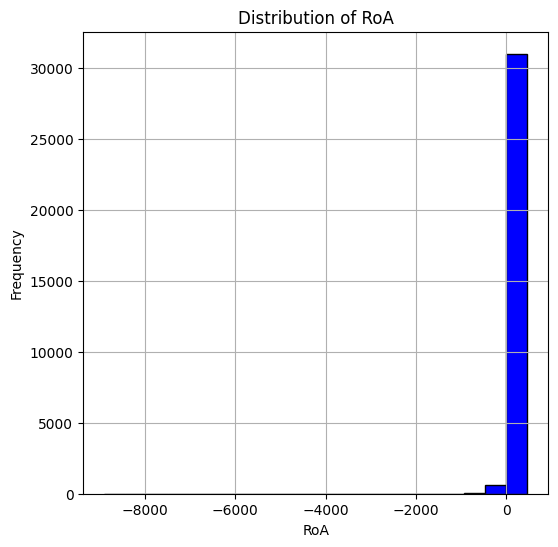

In [45]:
# Graphical Illustration
plt.figure(figsize=(6, 6))
plt.hist(df['roa'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of RoA')
plt.xlabel('RoA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [51]:
X = df[['roe', 'tangibility', 'leverage','quick_ratio', 'current_ratio', 'debt_equity','lt_asset', 'eps','bk_value','coc','mtb_ratio', 'r&d', 'market_value', 'rol', 'ch', 'capx', 'act', 'lct', 'ppent', 'ebit', 'ebitda', 'dltt', 'ni', 'lt', 'at'] ]
y = df['roa']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=102)
#add constant to predictor variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [53]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(X_train['const'].value_counts())
print(X_test['const'].value_counts())

const            0
roe              0
tangibility      0
leverage         0
quick_ratio      0
current_ratio    0
debt_equity      0
lt_asset         0
eps              0
bk_value         0
coc              0
mtb_ratio        0
r&d              0
market_value     0
rol              0
ch               0
capx             0
act              0
lct              0
ppent            0
ebit             0
ebitda           0
dltt             0
ni               0
lt               0
at               0
dtype: int64
const            0
roe              0
tangibility      0
leverage         0
quick_ratio      0
current_ratio    0
debt_equity      0
lt_asset         0
eps              0
bk_value         0
coc              0
mtb_ratio        0
r&d              0
market_value     0
rol              0
ch               0
capx             0
act              0
lct              0
ppent            0
ebit             0
ebitda           0
dltt             0
ni               0
lt               0
at               0

In [54]:
print(X_train.dtypes)
print(X_test.dtypes)

const            float64
roe              float64
tangibility      float64
leverage         float64
quick_ratio      float64
current_ratio    float64
debt_equity      float64
lt_asset         float64
eps              float64
bk_value         float64
coc              float64
mtb_ratio        float64
r&d              float64
market_value     float64
rol              float64
ch               float64
capx             float64
act              float64
lct              float64
ppent            float64
ebit             float64
ebitda           float64
dltt             float64
ni               float64
lt               float64
at               float64
dtype: object
const            float64
roe              float64
tangibility      float64
leverage         float64
quick_ratio      float64
current_ratio    float64
debt_equity      float64
lt_asset         float64
eps              float64
bk_value         float64
coc              float64
mtb_ratio        float64
r&d              float64
market_valu

In [55]:
print(X_train.describe())
print(X_test.describe())

         const           roe   tangibility      leverage   quick_ratio  \
count  25320.0  2.532000e+04  25320.000000  2.532000e+04  2.532000e+04   
mean       1.0  4.260716e+02      0.184284           inf           inf   
std        0.0  1.876870e+04      0.194893           NaN           NaN   
min        1.0 -1.128880e+05      0.000000 -3.005393e+02 -6.837607e-02   
25%        1.0 -1.716512e+00      0.043925  4.469741e-01  1.844817e-01   
50%        1.0 -2.985892e-04      0.116179  2.015005e+01  5.336714e-01   
75%        1.0  3.356195e+01      0.255776  4.522287e+02  1.340813e+00   
max        1.0  1.931917e+06      1.000000           inf           inf   

       current_ratio   debt_equity       lt_asset           eps      bk_value  \
count   2.532000e+04  2.532000e+04   25320.000000  25320.000000  2.532000e+04   
mean             inf           inf    3233.632921      0.651508  8.175260e+03   
std              NaN           NaN   16335.594923      8.226955  6.000156e+04   
min     0

In [56]:

#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())

MissingDataError: exog contains inf or nans

In [57]:
print('Coefficients:')
print(model.params)
print('\nR-squared:', model.rsquared)

Coefficients:


NameError: name 'model' is not defined

In [ ]:


def stepwise_selection(X, y, threshold):
    X_const = add_constant(X)
    result = OLS(y, X_const).fit()
    for i in range(X.shape[1]):
        new_X_const = add_constant(X.iloc[:, :i+1])
        new_result = OLS(y, new_X_const).fit()
        if new_result.pvalues[i+1] > threshold:
            X_const = new_X_const
            result = new_result
    return result

In [ ]:


def lasso_ridge_regression(X, y):
    lasso = Lasso(alpha=0.1)
    ridge = Ridge(alpha=0.1)

    lasso_scores = cross_val_score(lasso, X, y, cv=5, scoring='r2')
    ridge_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

    print('Lasso Cross-Validation Scores:', lasso_scores)
    print('Ridge Cross-Validation Scores:', ridge_scores)

    # Tune alpha using cross-validation
    # ...

    lasso_model = lasso.fit(X, y)
    ridge_model = ridge.fit(X, y)

    return lasso_model, ridge_model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regression(X, y):
    tree = DecisionTreeRegressor(random_state=0)
    tree.fit(X, y)

    # Predict using the decision tree
    # ...

    return tree